In [127]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error


In [55]:
data_path="diamonds.csv"

In [57]:
df=pd.read_csv(data_path)

In [59]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [63]:
df.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [65]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,53940.0,26970.500000,15571.281097,1.0,13485.75,26970.50,40455.25,53940.00
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [67]:
df.shape

(53940, 11)

In [69]:
len(df[df["z"]==0]),len(df[df["x"]==0]),len(df[df["y"]==0])

(20, 8, 7)

In [71]:
df[df["x"]==0].index

Index([11182, 11963, 15951, 24520, 26243, 27429, 49556, 49557], dtype='int64')

In [73]:
df=df.drop(df[df["x"]==0].index)
df=df.drop(df[df["y"]==0].index)
df=df.drop(df[df["z"]==0].index)

In [75]:
df.shape

(53920, 11)

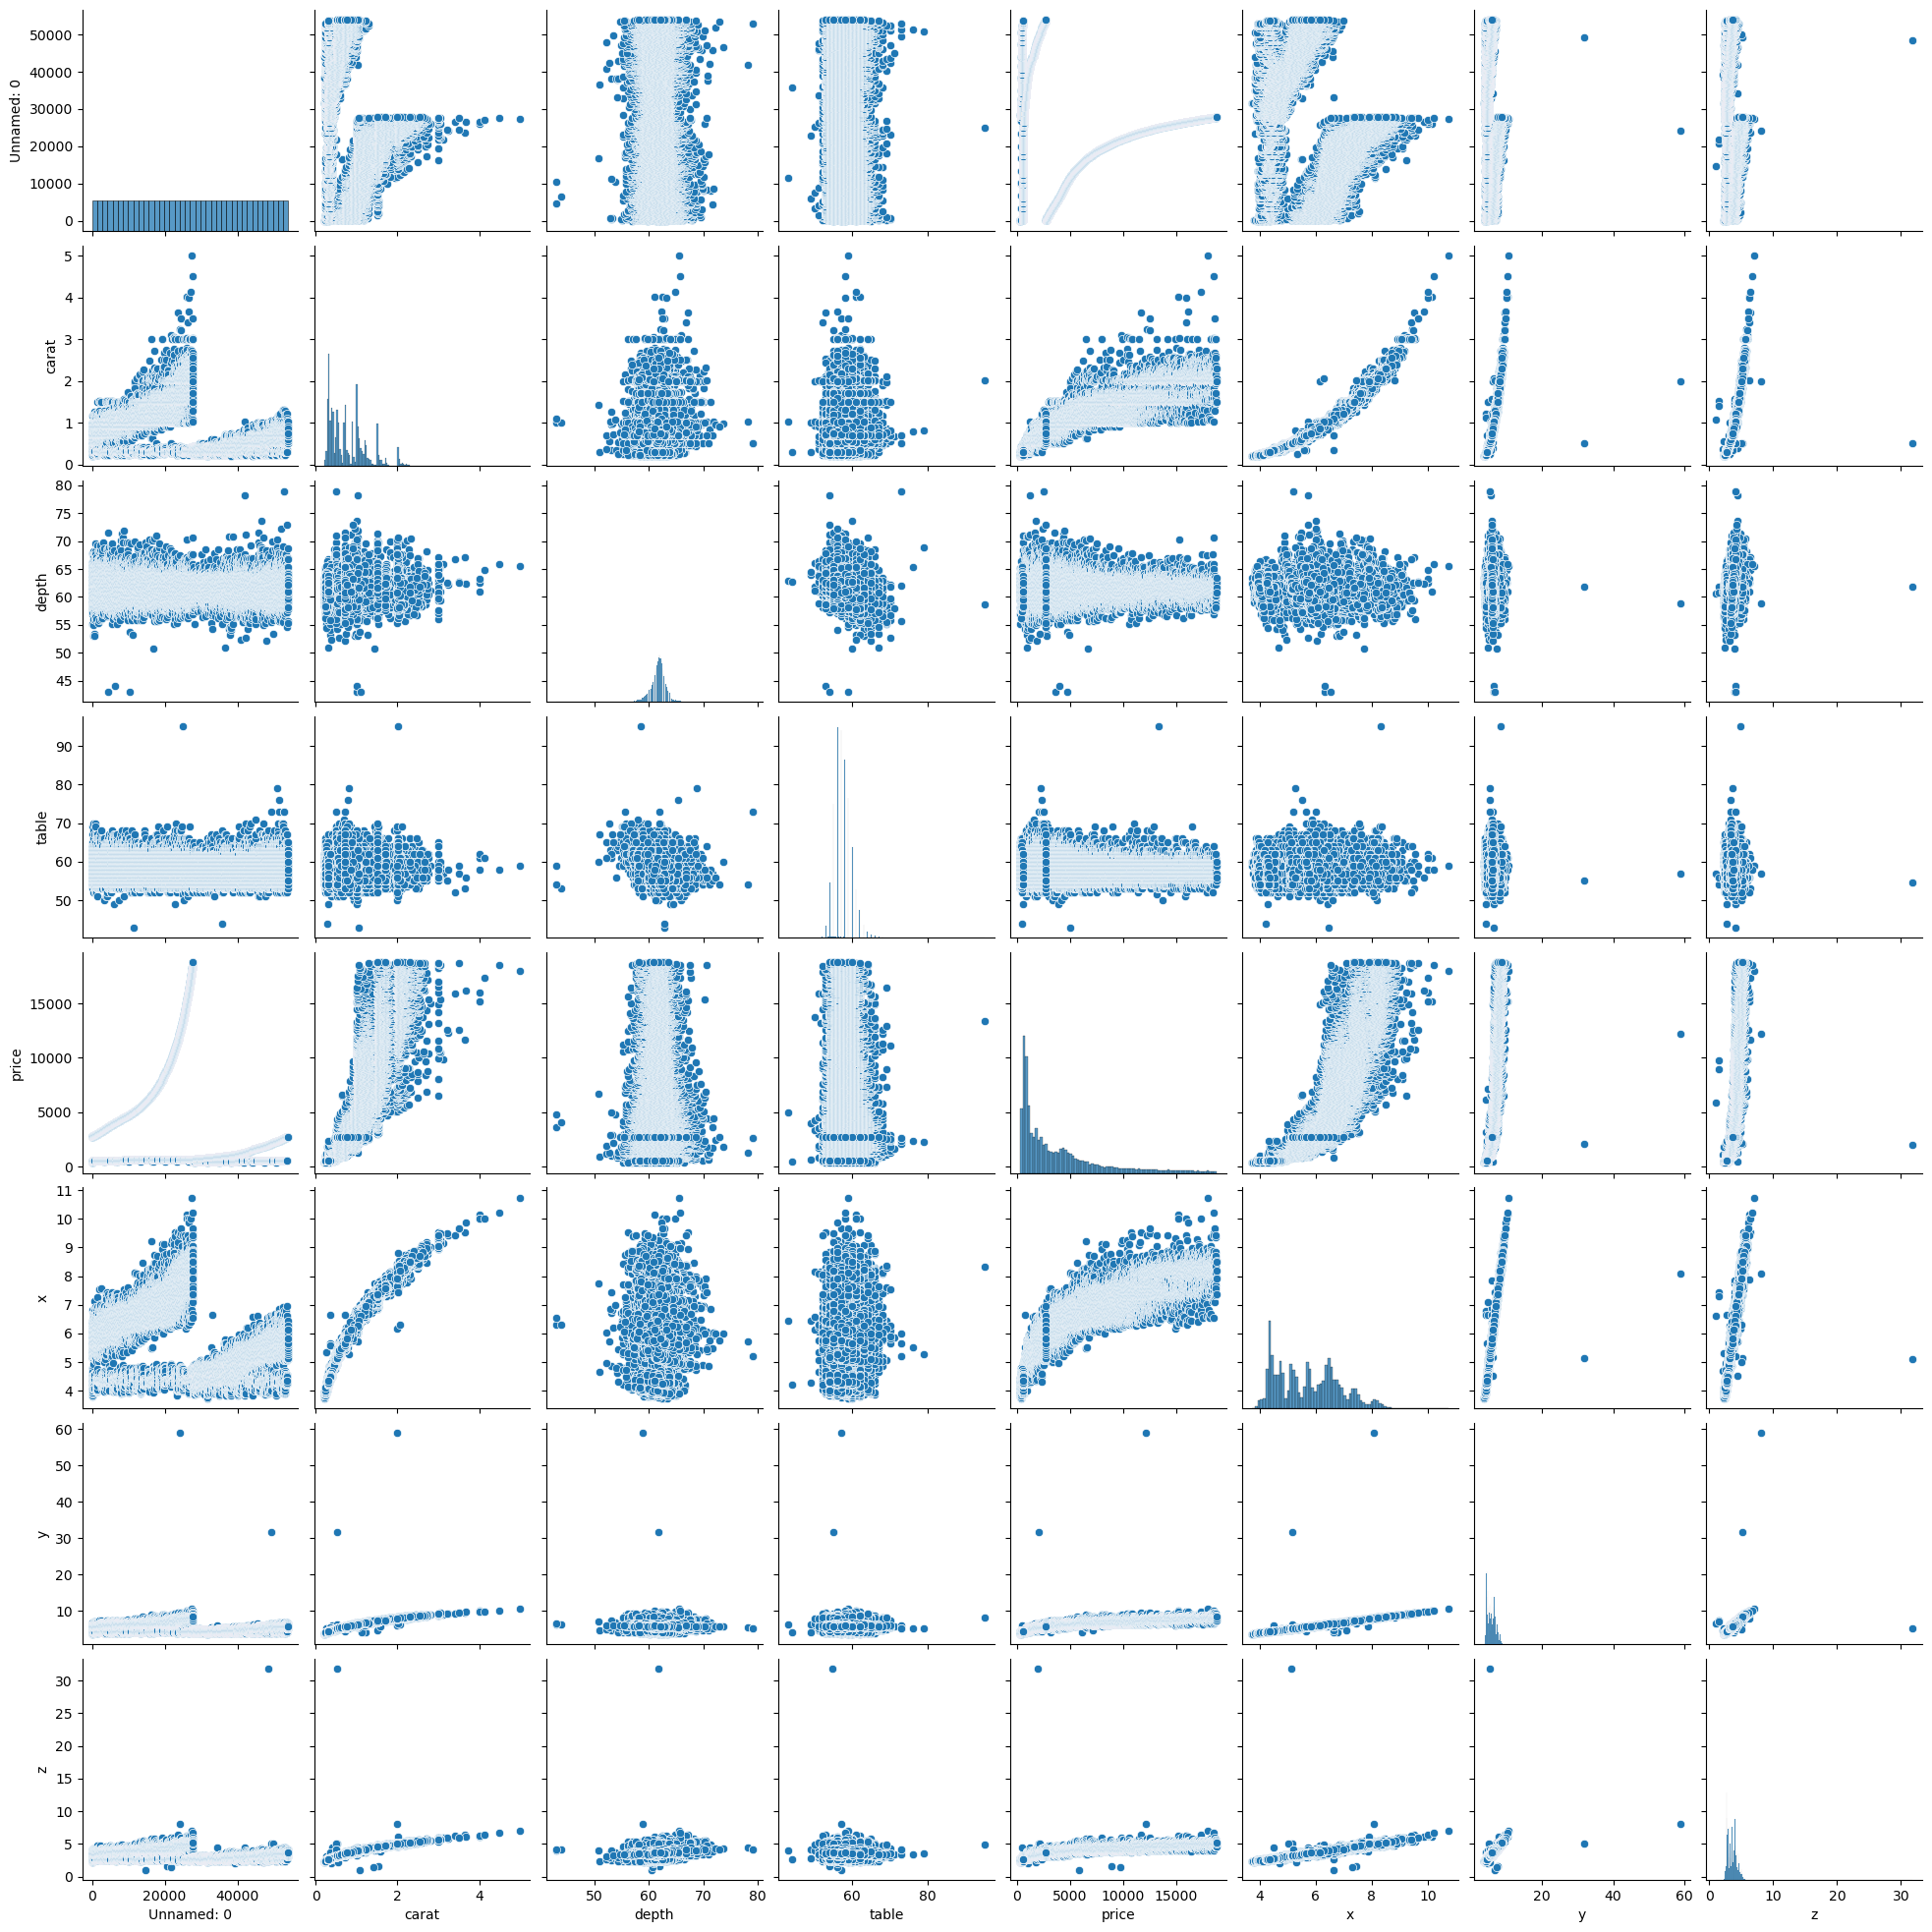

In [77]:
sns.pairplot(df)
plt.show()


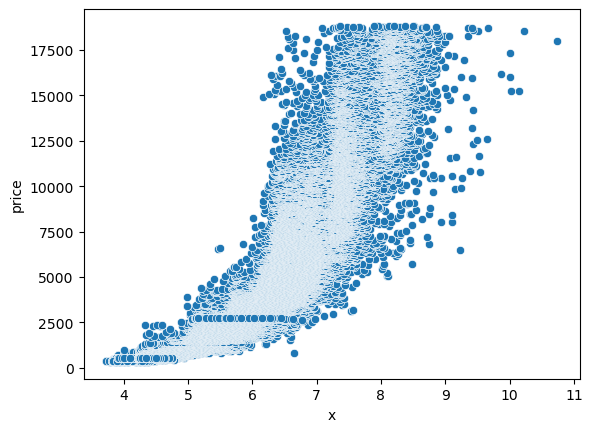

In [81]:
sns.scatterplot(x=df["x"],y=df["price"])
plt.show()

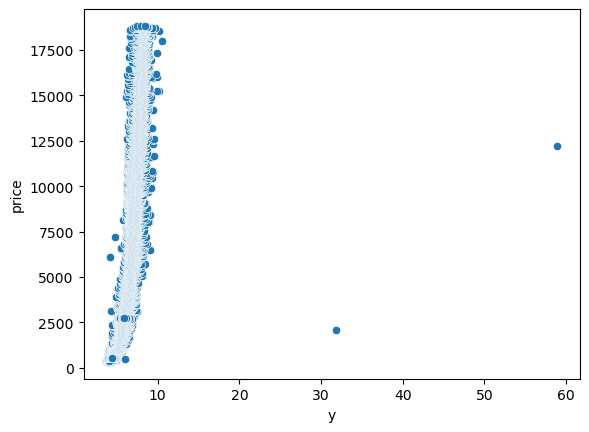

In [83]:
sns.scatterplot(x=df["y"],y=df["price"])
plt.show()

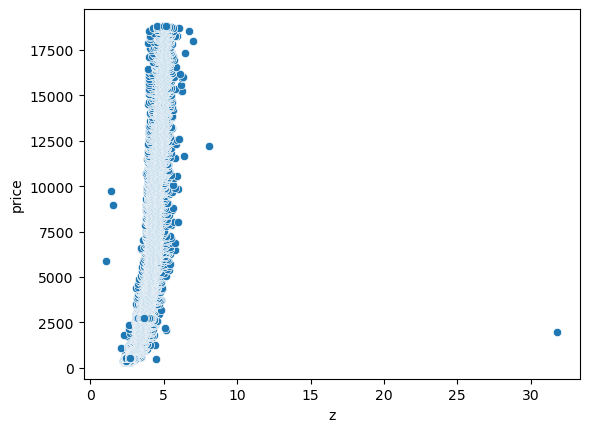

In [85]:
sns.scatterplot(x=df["z"],y=df["price"])
plt.show()

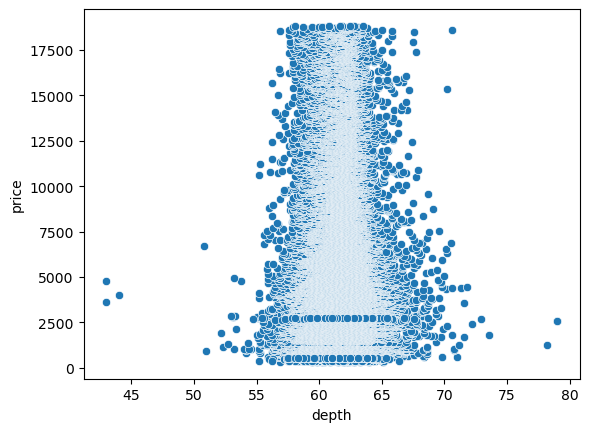

In [87]:
sns.scatterplot(x=df["depth"],y=df["price"])
plt.show()

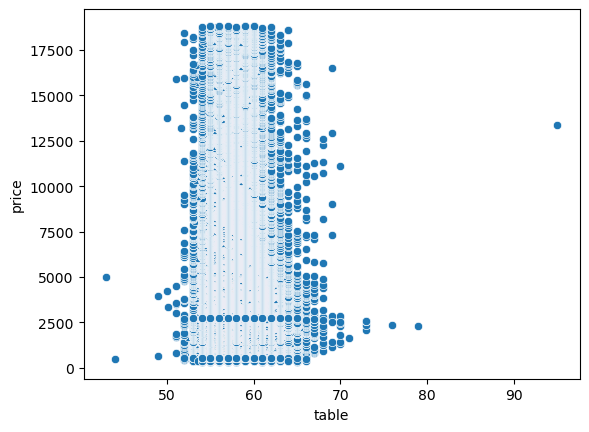

In [89]:
sns.scatterplot(x=df["table"],y=df["price"])
plt.show()

In [91]:
df=df[(df["depth"]<75)&(df["depth"]>45)]
df=df[(df["table"]<75)&(df["table"]>40)]
df=df[(df["z"]<30)&(df["z"]>2)]
df=df[(df["y"]<20)]

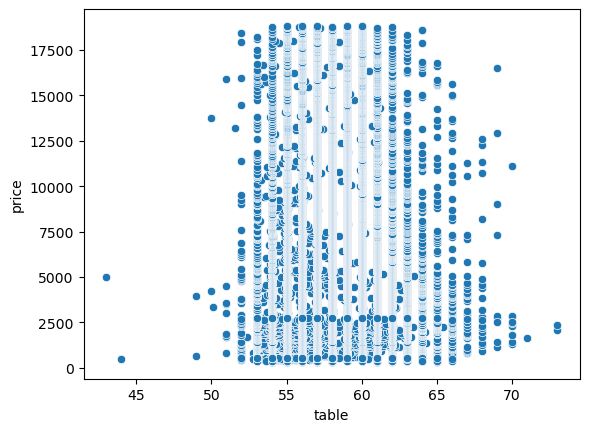

In [93]:
sns.scatterplot(x=df["table"],y=df["price"])
plt.show()

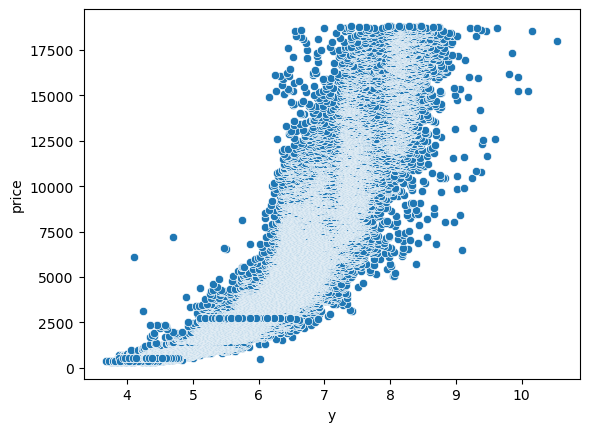

In [95]:
sns.scatterplot(x=df["y"],y=df["price"])
plt.show()

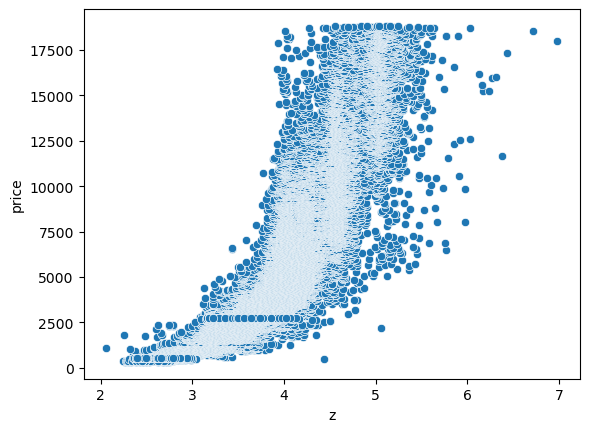

In [97]:
sns.scatterplot(x=df["z"],y=df["price"])
plt.show()

In [99]:
df["cut"].value_counts()

cut
Ideal        21543
Premium      13779
Very Good    12080
Good          4902
Fair          1601
Name: count, dtype: int64

In [101]:
df["color"].value_counts()

color
G    11281
E     9792
F     9535
H     8296
D     6774
I     5420
J     2807
Name: count, dtype: int64

In [103]:
df["clarity"].value_counts()

clarity
SI1     13058
VS2     12250
SI2      9183
VS1      8167
VVS2     5066
VVS1     3654
IF       1790
I1        737
Name: count, dtype: int64

In [105]:
X=df.drop("price",axis=1)
y=df["price"]

In [107]:
X.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75


In [109]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [111]:
label_encoder=LabelEncoder()

In [113]:
label_encoder_olacaklar =  ["cut","color","clarity"]

In [115]:
for col in label_encoder_olacaklar:
    X_train[col]=label_encoder.fit_transform(X_train[col])
    X_test[col]=label_encoder.transform(X_test[col])

In [117]:
X_train["cut"].value_counts()

cut
2    16153
3    10374
4     9039
1     3662
0     1200
Name: count, dtype: int64

In [119]:
X_test["cut"].value_counts()

cut
2    5390
3    3405
4    3041
1    1240
0     401
Name: count, dtype: int64

In [121]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

Mean absolute error 312.9195073087483
R2 Score 0.9719549650350363
Mean Squared error : 434124.66412109515


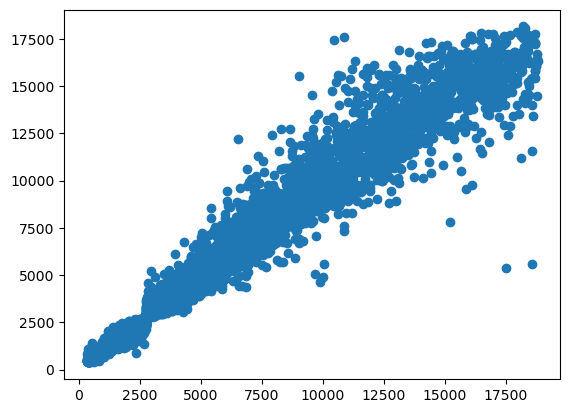

In [133]:
KNN_reg=KNeighborsRegressor()
KNN_reg.fit(X_train_scaled,y_train)
y_pred=KNN_reg.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
print("Mean Squared error :",mse)
plt.scatter(y_test,y_pred)
plt.show()